# Preparación de datos: "bank_dataset.csv"

# 1 - Importación de Librerías

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 

# 2 - Carga del dataset "raw" desde github

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/ITACADEMYprojectes/projecteML/e8d1aab0a24ddf55af9dfd9e83b1ea79e34c1af9/bank_dataset.CSV')

# 3 -  Exploración del dataset

In [140]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [141]:
# Visualización primeras filas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [142]:
# Estadísticas descriptivas para variables numéricas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [143]:
# Estadísticas descriptivas para variables categóricas
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11157,11155,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6349,5474,10994,5881,9702,8042,2824,8326,5873


In [144]:
# Recuento valores nulos por columna
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Comentarios:

De un primer análisis se puede ver que el conjunto de datos tiene 17 columnas, 11162 registros. El dataset contiene información sobre diversas características relacionadas con interacciones bancarias, que incluyen tanto variables numéricas como categóricas.  

Las variables categóricas son 10 e incluyen: job, marital, education, default (la variable objetivo), housing, loan, contact, month, poutcome y deposit .
Las Variables numéricas son 7 e incluyen: age, balance, day, duration, campaign, pdays, y previous.
Hay 22 valores faltantes presentes en las variables age, marital y education.
Mi variable objetivo es "default": indica si el cliente tiene un crédito en "deafult" (sin pagar).


Para las variables númericas se incluyó un análisis descriptivo evaluando medidas de tendencia central (media, mediana) y dispersión (desviación estándar).  
Para las variables categóricas también se detalla una descripción de los datos. 



# 4 - Gestión valores nulos

### Comentarios:

Antes de dividir el conjunto de datos en entrenamiento y prueba voy a tratar valores faltantes utilizando la mediana para las variables numéricas y la moda para categóricas que es el valor que aparece con mayor frecuencia.

In [145]:
#Para la variable númerica "age" uso la mediana
df['age'] = df['age'].fillna(df['age'].median())

#Para las variables categóricas "marital" y "education" uso la moda, que es el valor que aparece con mayor frecuencia
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

#compruebo
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 5 - Cambio de tipo de variable

### Comentarios

Previo a la división del dataset y para posteriormente poder correr el modelo de ML con mayor facilidad cambiare mi variable objetivo "default" de categórica a númerica, así como tambien de la variables "loan" (si tiene un crédito personal), housing (so tien un crédito hipotecario) y "deposit" (si tiene un deposito) que tiene como valores "sí" o "no" y entiendo me serán de utilidad mas adelante. Para evitar que me queden como "nan" tambíen las convertí de float a int.

In [146]:
print("Valores únicos en 'default':", df['default'].unique())
print("Valores únicos en 'loan':", df['loan'].unique())
print("Valores únicos en 'deposit':", df['deposit'].unique())
print("Valores únicos en 'housing':", df['deposit'].unique())

Valores únicos en 'default': ['no' 'yes']
Valores únicos en 'loan': ['no' 'yes']
Valores únicos en 'deposit': ['yes' 'no']
Valores únicos en 'housing': ['yes' 'no']


In [147]:
# Transformo los valores "yes" a 1 y "no" a 0 

df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

# Convertir las columnas a enteros (int)
df['default'] = df['default'].astype(int)
df['loan'] = df['loan'].astype(int)
df['deposit'] = df['deposit'].astype(int)
df['housing'] = df['housing'].astype(int)

# Verificación
print('default:', df['default'].dtype)
print('loan:', df['loan'].dtype) 
print('deposit:',df['deposit'].dtype) 
print('housing:',df['housing'].dtype) 

default: int32
loan: int32
deposit: int32
housing: int32


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  int32  
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  int32  
 7   loan       11162 non-null  int32  
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  int32  
dtypes: float64(1), int32(4), int64(6), object(6)
memory usage: 1.3+ MB


In [120]:
#verifo no tener nulos después del mapeo

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 6 - División del dataset en "train" y "test"

### Comentarios

Utilizare el método "Train/Test" donde dividire el dataset en dos conjuntos de datos, el de entrenamiento con un 80% de los datos, y el de prueba con el restante 20%. Esta proporción es la standard. Con el de entrenamiento creare el modelo, y con el de prueba comprobare la precisión del modelo.También asegurare que la división sea reproducible con random_state=0 y que proporción de "default" sea la misma en ambos conjuntos con stratify=y.

Se verificó la estratificacion y el balance de las clases se mantiene.


In [149]:
# Separo las columnas de las caracteristicas (X) y la variable objetivo (y) 
X = df.drop(columns=['default'])  # caracteristicas (features)
y = df['default']  # Variable objetivo (label)


# Divido los datasets en conjuntos de entrenamiento (train) y prueba(test)
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=y)

#Verifico
print("Tamaño del conjunto de entrenamiento (train):", train.shape)
print("Tamaño del conjunto de prueba (test):", test.shape)

Tamaño del conjunto de entrenamiento (train): (8929, 17)
Tamaño del conjunto de prueba (test): (2233, 17)


In [150]:
# Verifico el balance de clases (estratificación):
# Proporción de clases en el dataset original
print("Proporción de clases en el dataset original:")
print(y.value_counts(normalize=True))

# Proporción de clases en el conjunto de entrenamiento
print("\nProporción de clases en el conjunto de entrenamiento:")
print(train['default'].value_counts(normalize=True))

# Proporción de clases en el conjunto de prueba
print("\nProporción de clases en el conjunto de prueba:")
print(test['default'].value_counts(normalize=True))

Proporción de clases en el dataset original:
0    0.984949
1    0.015051
Name: default, dtype: float64

Proporción de clases en el conjunto de entrenamiento:
0    0.984993
1    0.015007
Name: default, dtype: float64

Proporción de clases en el conjunto de prueba:
0    0.984774
1    0.015226
Name: default, dtype: float64


In [151]:
# Chequeo las primeras filas de ambos conjuntos
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2524,49.0,management,married,tertiary,0,1,0,0,telephone,13,aug,640,2,101,4,success,1
10329,47.0,blue-collar,married,primary,0,4040,0,0,cellular,11,aug,53,5,-1,0,unknown,0
2784,65.0,retired,married,secondary,0,571,1,0,cellular,20,oct,349,1,183,2,success,1
5558,36.0,services,single,primary,0,38,0,0,unknown,6,jun,308,4,-1,0,unknown,0
3126,36.0,technician,married,tertiary,0,202,0,0,cellular,29,jan,313,1,120,3,failure,1


In [152]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
643,50.0,blue-collar,married,unknown,0,2284,1,0,telephone,31,jul,1088,17,-1,0,unknown,1
6148,43.0,retired,married,primary,0,7298,0,0,unknown,11,jun,36,2,-1,0,unknown,0
4334,25.0,technician,single,secondary,0,4718,0,0,cellular,24,jul,709,1,-1,0,unknown,1
1687,33.0,blue-collar,single,unknown,0,129,1,1,cellular,30,apr,482,1,161,1,failure,1
1540,41.0,technician,married,secondary,0,4004,0,0,cellular,17,apr,314,2,-1,0,unknown,1


# 7 - Detección y gestion de outliers en "train"

### Comentarios

Hago la detección y tratamiento de outliers en el dataset de entrenamiento y luego aplico directamente él metodo al dataset de prueba. Elimino del análisis mi variable objetivo, así como las que convertí en 1 y 0 anteriormente: default, loan, deposit y housing para simplificar la visualización gráfica ya que son variables binarias. 

In [153]:
# Lista de columnas númericas para detectar outliers
columnas_outlier = ['age', 'balance', 'day', 'duration','campaign','pdays','previous']

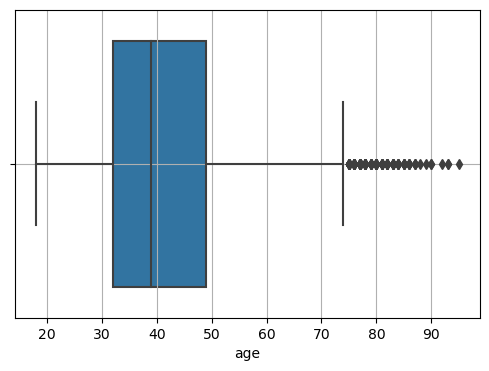

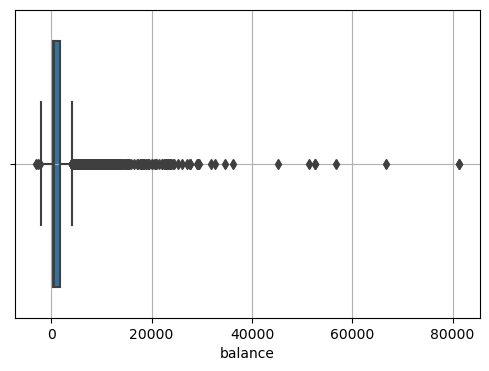

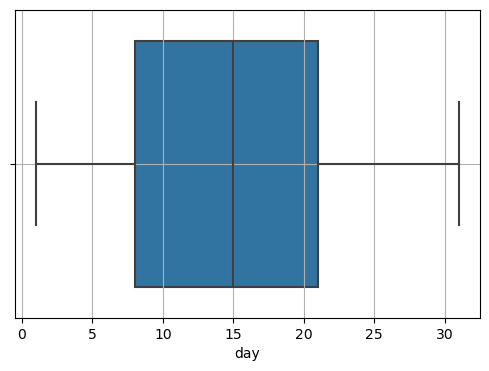

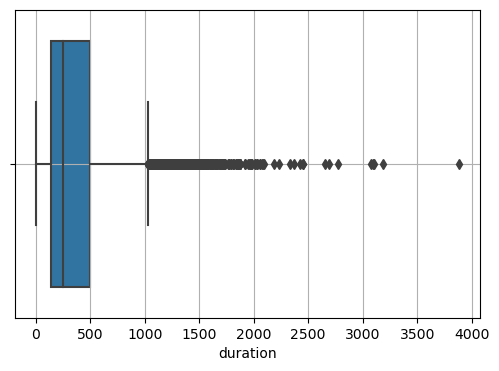

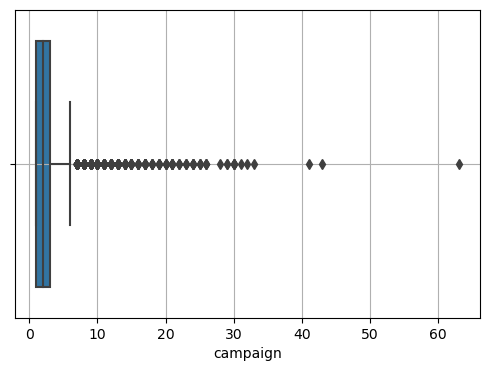

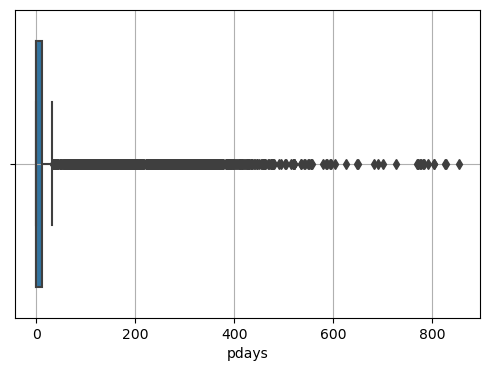

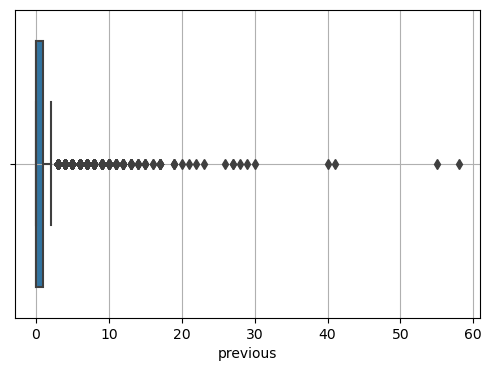

In [154]:
# Detección de outliers con boxplots para las columnas definidas
for i in columnas_outlier:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[i])
    plt.xlabel(i)
    plt.grid(True)
    plt.show() 

In [155]:
# En esta instancia para tratar los outliers aplicaré la Winsorización de forma de mantener todos los datos reduciendo el impacto de los valores atípcos

# Función para calcular límites IQR
def calculate_iqr_limits(df, columns):
    limits_dict = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        limits_dict[column] = (lower_bound, upper_bound)
        
    return limits_dict



In [156]:
# Función para winsorizar datos
def winsorize_data(df, columns):
    limits_dict = calculate_iqr_limits(df, columns)
    
    for column, (lower_bound, upper_bound) in limits_dict.items():
        # Winsorizar: Reemplazar valores menores que el límite inferior y mayores que el límite superior
        df[column] = np.clip(df[column], lower_bound, upper_bound)
        
    return df

In [157]:
# Defino las columnas a winsorizar: Veo que hay outliers en todas las columnas previamente seleccionadas (puntos fuera de los "bigotes") salvo en "day"
columnas_wins = ['age', 'balance', 'duration','campaign','pdays','previous']

In [158]:
# Aplico winsorización a las columnas especificadas
train_winsorized = winsorize_data(train, columnas_wins)

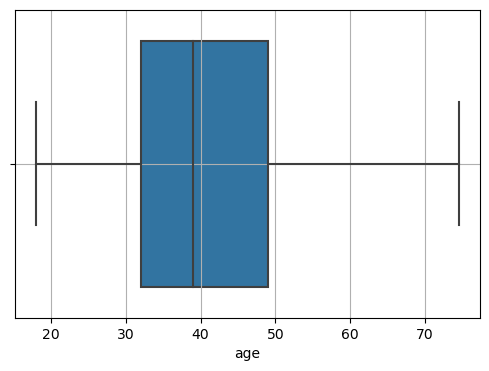

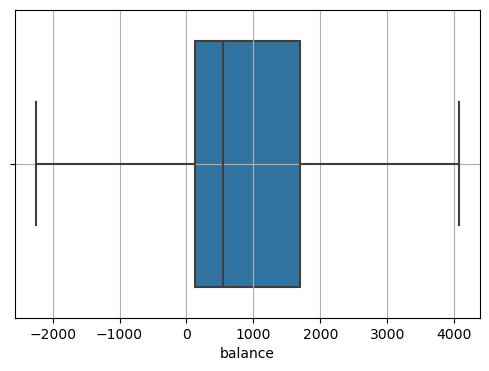

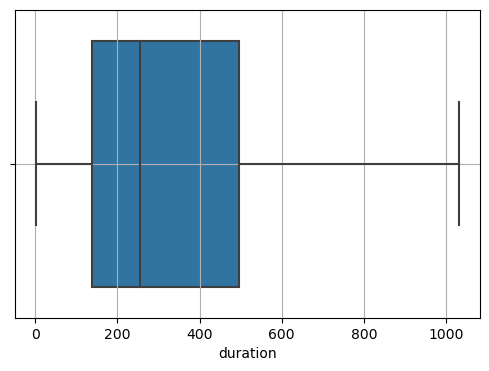

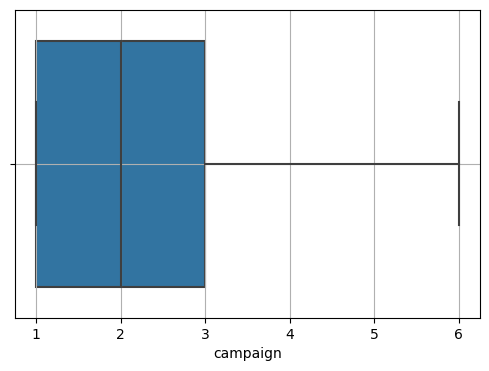

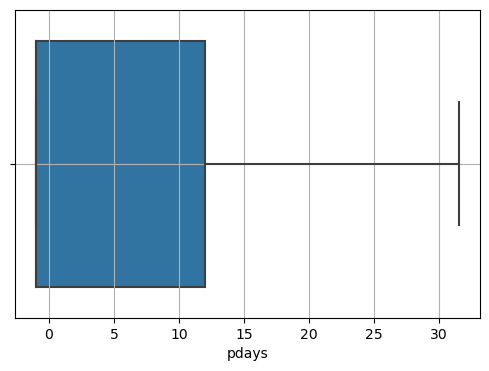

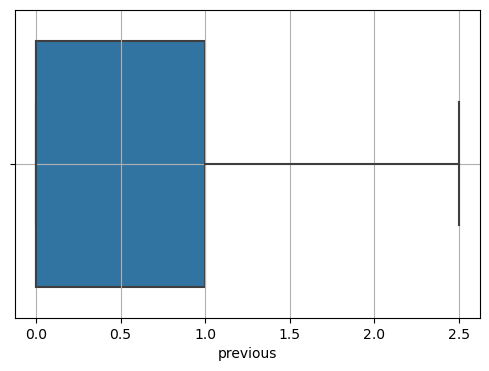

In [159]:
# Comprobamos que no haya outliers
for column in columnas_wins:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No se detectan outliers

In [160]:
# Obtener una descripción estadística de las variables númericas del dataset `train`
train.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.146545,0.015007,1116.586628,0.471833,0.128234,15.598947,353.191903,2.251092,7.123362,0.483929,0.471721
std,11.659209,0.121588,1347.587217,0.499234,0.334369,8.401288,285.539393,1.531445,14.037123,0.890477,0.499228
min,18.000000,0.000000,-2248.500000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,120.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,545.000000,0.000000,0.000000,15.000000,254.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1699.000000,1.000000,0.000000,21.000000,495.000000,3.000000,12.000000,1.000000,1.000000
max,74.500000,1.000000,4067.500000,1.000000,1.000000,31.000000,1030.500000,6.000000,31.500000,2.500000,1.000000


### Comentarios

Luego de aplicar la winsorización , puedo comprobar gráficamente y estadisticamente que se hizo una correcta gestión de los valores atípcos al reemplazarlos con los valores mas cercanos. Por ejemplo, al inicio, "balance" tenía una std de 3225 y ahora tiene 1347

# 8 - Identificación de características númericas relevantes en "train"

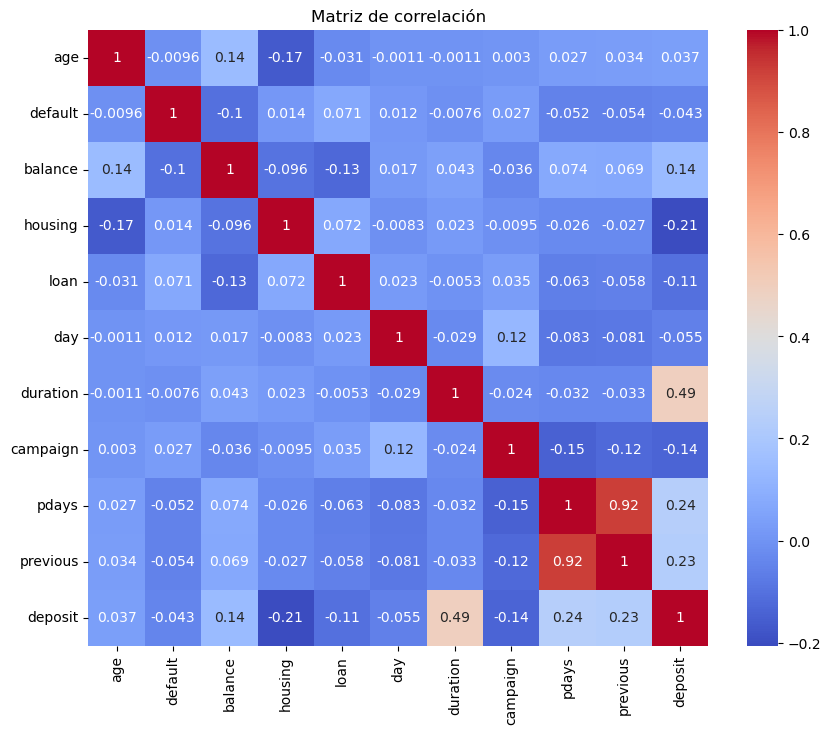

In [161]:
## Matriz de correlación para variables numéricas
train_numeric = train.select_dtypes(include=['number'])

corr_matrix = train_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

### Comentarios

De la matriz puedo ver que mi variable objetivo no tiene relaciones fuerte con el resto de las variables, sin embargo encuentro que hay:
- una correlación lineal positiva moderada entre "loan" y "default"
- una correlación lineal negativa moderada entre "balance" y "default"
- una correlación lineal negativa debil entre "pdays", "previous", "deposit" y "default".

Por lo que las caracteristicas númericas seleccionadas como relevantes serán 'balance', 'loan','pdays','previous' y'deposit'

   

In [162]:
# Elimino las variables numericas irrelevantes de mi dataset:

columnas_a_eliminar = ['age','housing', 'day', 'duration', 'campaign']
train = df.drop(columns=columnas_a_eliminar)

train.describe()

,default,balance,loan,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.015051,1528.538524,0.130801,51.330407,0.832557,0.473840
std,0.121761,3225.413326,0.337198,108.758282,2.292007,0.499338
min,0.000000,-6847.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,122.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,550.000000,0.000000,-1.000000,0.000000,0.000000
75%,0.000000,1708.000000,0.000000,20.750000,1.000000,1.000000
max,1.000000,81204.000000,1.000000,854.000000,58.000000,1.000000


# 9 - Codificación de variables categóricas en "train"

### Comentarios

Para la codificación de las variables categóricas que del dataset "train" utilizaré el método One-Hot Encoding ya que no existe un orden inherente en las categorías. Usare el mismo método para ambos datasets, identificando primero las variables categóricas y viendo si tienen demasiados valores únicos que signifique alguna modificación adicional, como una agrupación.


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  int32  
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  int32  
 7   loan       11162 non-null  int32  
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  int32  
dtypes: float64(1), int32(4), int64(6), object(6)
memory usage: 1.3+ MB


In [164]:
# Identifico las variables categóricas
categoricas = train.select_dtypes(include=['object']).columns
print("Variables categóricas en train:", categoricas)
print()

# Veo los valores únicos de las variables categóricas
for col in categoricas:
    print(f"Valores únicos en '{col}':", train[col].unique())

Variables categóricas en train: Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

Valores únicos en 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Valores únicos en 'marital': ['married' 'single' 'divorced']
Valores únicos en 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Valores únicos en 'contact': ['unknown' 'cellular' 'telephone']
Valores únicos en 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Valores únicos en 'poutcome': ['unknown' 'other' 'failure' 'success']


In [165]:
#Reagrupaciones
# Diccionario de mapeo
month_to_season = {
    'mar': 'Primavera', 'apr': 'Primavera', 'may': 'Primavera',
    'jun': 'Verano', 'jul': 'Verano', 'aug': 'Verano',
    'sep': 'Otoño', 'oct': 'Otoño', 'nov': 'Otoño',
    'dec': 'Invierno', 'jan': 'Invierno', 'feb': 'Invierno'
}

# Reemplazar los valores de 'month' con las estaciones correspondientes
train['month'] = train['month'].map(month_to_season)

# Diccionario de mapeo
job_to_skill = {
    'admin.': 'Cualificado', 'technician': 'Cualificado', 'services': 'No cualificado',
    'management': 'Cualificado', 'retired': 'No cualificado', 'blue-collar': 'No cualificado',
    'unemployed': 'No cualificado', 'entrepreneur': 'Cualificado', 'housemaid': 'No cualificado',
    'unknown': 'Desconocido', 'self-employed': 'Cualificado', 'student': 'No cualificado'
}

# Reemplazar los valores de 'job' con las categorías correspondientes
train['job'] = train['job'].map(job_to_skill)


# Verifico los cambios:
for col in categoricas:
    print(f"Valores únicos en '{col}':", train[col].unique())

Valores únicos en 'job': ['Cualificado' 'No cualificado' 'Desconocido']
Valores únicos en 'marital': ['married' 'single' 'divorced']
Valores únicos en 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Valores únicos en 'contact': ['unknown' 'cellular' 'telephone']
Valores únicos en 'month': ['Primavera' 'Verano' 'Otoño' 'Invierno']
Valores únicos en 'poutcome': ['unknown' 'other' 'failure' 'success']


In [166]:
# Verificar los cambios en train
print(train[['month']].head())
print(train[['job']].head())

       month
0  Primavera
1  Primavera
2  Primavera
3  Primavera
4  Primavera
              job
0     Cualificado
1     Cualificado
2     Cualificado
3  No cualificado
4     Cualificado


In [168]:
#Codifico las 6 variables categoricas para el set de entrenamiento:
train = pd.get_dummies(train, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='int', drop_first=True) # elimino la primer columna para evitar multicolinealidad

# visualizo el nuevo dataset
train.head()

,default,balance,loan,pdays,previous,deposit,job_Desconocido,job_No cualificado,marital_married,marital_single,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Otoño,month_Primavera,month_Verano,poutcome_other,poutcome_success,poutcome_unknown
0,0,2343,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,45,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,0,1270,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,0,2476,0,-1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,184,0,-1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Comentarios
Con la reagrupación solo quedaron 21 columnas es algo gestionable para mi modelo por lo cual no haré mas modificaciones a las variables categoricas. 

# 10 - Estandarización de variables númericas en "train"

### Comentarios

Aplicar estandarización númericas para que no haya problemas de escala. Lo hare para todas las variables menos para la variable objetivo porque quiero mantener la interpretación en su escala original.


In [169]:
#Situación antes de estandarizar
train.describe()

,default,balance,loan,pdays,previous,deposit,job_Desconocido,job_No cualificado,marital_married,marital_single,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Otoño,month_Primavera,month_Verano,poutcome_other,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.015051,1528.538524,0.130801,51.330407,0.832557,0.473840,0.006271,0.415338,0.569253,0.315087,...,0.330138,0.044436,0.069342,0.210177,0.148181,0.360419,0.381204,0.048110,0.095951,0.745924
std,0.121761,3225.413326,0.337198,108.758282,2.292007,0.499338,0.078946,0.492802,0.495203,0.464571,...,0.470284,0.206072,0.254047,0.407453,0.355296,0.480144,0.485704,0.214008,0.294537,0.435360
min,0.000000,-6847.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,122.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,550.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1708.000000,0.000000,20.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,81204.000000,1.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
# Especificar las columnas numéricas a estandarizar, son solo 2 porque el resto de las variables númericas ya son binarias.
columnas_stand = ['balance','pdays']

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la estandarización solo a las columnas numéricas
train[columnas_stand] = scaler.fit_transform(train[columnas_stand])



In [171]:
# Verificar estandarización. Recordar que no se estandariza la variable objetivo porque queremos mantener la interpretación en su escala original.
train.describe()

,default,balance,loan,pdays,previous,deposit,job_Desconocido,job_No cualificado,marital_married,marital_single,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Otoño,month_Primavera,month_Verano,poutcome_other,poutcome_success,poutcome_unknown
count,11162.000000,1.116200e+04,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.015051,9.961372e-17,0.130801,-8.213994e-15,0.832557,0.473840,0.006271,0.415338,0.569253,0.315087,...,0.330138,0.044436,0.069342,0.210177,0.148181,0.360419,0.381204,0.048110,0.095951,0.745924
std,0.121761,1.000045e+00,0.337198,1.000045e+00,2.292007,0.499338,0.078946,0.492802,0.495203,0.464571,...,0.470284,0.206072,0.254047,0.407453,0.355296,0.480144,0.485704,0.214008,0.294537,0.435360
min,0.000000,-2.596850e+00,0.000000,-4.811841e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.360996e-01,0.000000,-4.811841e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-3.033975e-01,0.000000,-4.811841e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,5.564233e-02,0.000000,-2.811903e-01,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,2.470351e+01,1.000000,7.380638e+00,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 11 - Aplico las transformaciones en "test"

### Comentarios

Detallo las diferentes etapas y lo que hare:

- Imputación de Valores Faltantes: Se hizo previo a la separacion de datasets

- Gestión de outliers: aplico el mismo método de Winsorizacion sin necesidad de detección.

- Selección de Características Relevantes: mismo esquema

- Codificación de Variables Categóricas: mismo esquema

- Estandarización: mismo esquema

In [172]:
#Situación inicial
test.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,41.251232,0.015226,1463.669055,0.47828,0.141066,15.894313,370.142409,2.392297,52.338558,0.862965,0.482311
std,11.860337,0.122479,2829.226127,0.49964,0.348167,8.495863,346.320067,2.446044,109.589447,2.256221,0.499799
min,18.000000,0.000000,-6847.000000,0.00000,0.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,130.000000,0.00000,0.000000,9.000000,137.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,563.000000,0.00000,0.000000,16.000000,259.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1740.000000,1.00000,0.000000,22.000000,501.000000,3.000000,56.000000,1.000000,1.000000
max,92.000000,1.000000,37127.000000,1.00000,1.000000,31.000000,3284.000000,43.000000,842.000000,37.000000,1.000000


In [173]:
# Gestión de outliers (Winsorización)
# Aplicar winsorización a las columnas especificadas
test_winsorized = winsorize_data(test, columnas_wins)



In [174]:
# Obtengo una descripción estadística del DataFrame `test`
test.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,41.182714,0.015226,1119.070309,0.47828,0.141066,15.894313,352.058665,2.188536,31.329154,0.491267,0.482311
std,11.643015,0.122479,1355.534132,0.49964,0.348167,8.495863,281.676480,1.478585,56.690294,0.901035,0.499799
min,18.000000,0.000000,-2285.000000,0.00000,0.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,130.000000,0.00000,0.000000,9.000000,137.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,563.000000,0.00000,0.000000,16.000000,259.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1740.000000,1.00000,0.000000,22.000000,501.000000,3.000000,56.000000,1.000000,1.000000
max,74.500000,1.000000,4155.000000,1.00000,1.000000,31.000000,1047.000000,6.000000,141.500000,2.500000,1.000000


In [175]:
# Identificación de Características Relevantes:

# Elimino las variables numericas irrelevantes de mi dataset:

columnas_a_eliminar = ['age','housing', 'day', 'duration', 'campaign']
test = df.drop(columns=columnas_a_eliminar)

test.describe()


,default,balance,loan,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.015051,1528.538524,0.130801,51.330407,0.832557,0.473840
std,0.121761,3225.413326,0.337198,108.758282,2.292007,0.499338
min,0.000000,-6847.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,122.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,550.000000,0.000000,-1.000000,0.000000,0.000000
75%,0.000000,1708.000000,0.000000,20.750000,1.000000,1.000000
max,1.000000,81204.000000,1.000000,854.000000,58.000000,1.000000


In [176]:
#Reagrupaciones
# Reemplazar los valores de 'month' con las estaciones correspondientes
test['month'] = test['month'].map(month_to_season)

# Reemplazar los valores de 'job' con las categorías correspondientes
test['job'] = test['job'].map(job_to_skill)


# Verifico los cambios:
for col in categoricas:
    print(f"Valores únicos en '{col}':", test[col].unique())
    
# Codificación de Variables Categóricas

#Codifico las 6 variables categoricas para el set de test:
test = pd.get_dummies(test, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='int', drop_first=True) # elimino la primer columna para evitar multicolinealidad


# visualizo el nuevo dataset
test.head()

Valores únicos en 'job': ['Cualificado' 'No cualificado' 'Desconocido']
Valores únicos en 'marital': ['married' 'single' 'divorced']
Valores únicos en 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Valores únicos en 'contact': ['unknown' 'cellular' 'telephone']
Valores únicos en 'month': ['Primavera' 'Verano' 'Otoño' 'Invierno']
Valores únicos en 'poutcome': ['unknown' 'other' 'failure' 'success']


,default,balance,loan,pdays,previous,deposit,job_Desconocido,job_No cualificado,marital_married,marital_single,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Otoño,month_Primavera,month_Verano,poutcome_other,poutcome_success,poutcome_unknown
0,0,2343,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,45,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,0,1270,0,-1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,0,2476,0,-1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,184,0,-1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [177]:
# Estandarizar


# Aplico la estandarización solo a las columnas numéricas
columnas_stand = ['balance','pdays']
test[columnas_stand] = scaler.transform(test[columnas_stand])


# Verifico estandarización. Recordar que no se estandariza la variable objetivo
test.head()

,default,balance,loan,pdays,previous,deposit,job_Desconocido,job_No cualificado,marital_married,marital_single,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_Otoño,month_Primavera,month_Verano,poutcome_other,poutcome_success,poutcome_unknown
0,0,0.252525,0,-0.481184,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0,-0.459974,0,-0.481184,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,0,-0.080160,0,-0.481184,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0.293762,0,-0.481184,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,-0.416876,0,-0.481184,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# 12 - Entreno el modelo


Luego de haber realizado todo el procesamiento de datos, entiendo que mis datasets "train" y "test" están en un formato adecuado para el modelado, garantizando calidad y consistencia.

In [178]:
# Especificar las columnas para características y variable objetivo
feature_columns = ['balance', 'loan', 'pdays', 'previous', 'deposit']
target_column = 'default'

In [179]:
#Verifico los valores
print(type(feature_columns))
print(feature_columns)
print()
print(type(target_column))
print(target_column)

<class 'list'>
['balance', 'loan', 'pdays', 'previous', 'deposit']

<class 'str'>
default


In [180]:
# Separo características (X) y variable objetivo (y) en el conjunto de entrenamiento. 
X_train = train[feature_columns]
y_train = train[target_column]

# Separo características (X) y variable objetivo (y) en el conjunto de prueba
X_test = test[feature_columns]
y_test = test[target_column]



In [181]:
# Creo el modelo de Regresión Logística
modelo = LogisticRegression().fit(X_train, y_train)
np.set_printoptions(suppress=True)

print(modelo.predict(X_test))
print()
print(modelo.predict_proba(X_test))
print()
print(modelo.score(X_test, y_test))
print()
print(modelo.intercept_, modelo.coef_)

[0 0 0 ... 0 0 0]

[[0.99911016 0.00088984]
 [0.97822318 0.02177682]
 [0.99601286 0.00398714]
 ...
 [0.97184707 0.02815293]
 [0.98780323 0.01219677]
 [0.97071416 0.02928584]]

0.9846801648450099

[-5.66774523] [[-4.51746843  0.75240902 -0.05376684 -0.31205271 -0.24093429]]


In [182]:
# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcula las métricas
cm = confusion_matrix(y_test, y_pred) # Matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Imprime las métricas
print("Confusion Matrix:")
print(cm)
print()
print(f"Accuracy: {accuracy:.2f}")
print()
print(f"Precision: {precision:.2f}")
print()
print(f"Recall: {recall:.2f}")
print()
print(f"F1-score: {f1:.2f}")

Confusion Matrix:
[[10990     4]
 [  167     1]]

Accuracy: 0.98

Precision: 0.20

Recall: 0.01

F1-score: 0.01

AUC-ROC: 0.86


### Interpretación de los resultados:

#### Confusion Matrix:

-> Clase negativa (no positiva):
  - 10,990 predicciones negativas correctas (True Negatives, TN).
  - 4 falsos positivos (False Positives, FP): casos predichos como positivos, pero son negativos.

-> Clase positiva:
 - 167 falsos negativos (False Negatives, FN): casos positivos reales que el modelo no detectó.
 - 1 predicción positiva correcta (True Positive, TP).

El modelo tiene una fuerte tendencia a predecir la clase negativa (mayoría) y detecta solo 1 caso positivo correctamente, lo que indica problemas para identificar la clase positiva.

####  Accuracy (0.98):

El modelo clasifica correctamente el 98% de los ejemplos totales. 
Sin embargo como mi conjunto es muy desbalanceado, esta métrica puede ser engañosa ya que la clase negativa domina (casi el 99% del total), lo que significa que el modelo puede lograr un alto "accuracy" simplemente prediciendo casi siempre la clase negativa.

#### Precision (0.20):
Solo el 20% de las predicciones positivas del modelo son correctas. El modelo solo hizo 5 predicciones positivas (TP + FP = 1 + 4 = 5), y de esas, solo 1 fue correcta (TP). Esto significa que el modelo rara vez predice la clase positiva, pero cuando lo hace, la mayoría de las veces está equivocado.

#### Recall (0.01):
El modelo identifica correctamente solo el 1% de los casos positivos reales. Hay 168 casos positivos reales (TP + FN = 1 + 167 = 168), pero solo detecta 1 como positivo (TP). Lo que indica nuevamente que el modelo no es efectivo para identificar la clase positiva.
####  F1-score (0.01):
Un valor bajo indica que el modelo tiene un balance deficiente entre precisión y recall para la clase positiva.


Como grandes cuestiones del modelo tenemos que hay una dominancia de la clase negativa, donde el modelo clasifica casi todo como negativo y una clase positiva subrepresentada, lo que afecta negativamente las métricas. 

Pareciera que el modelo actual no es efectivo para identificar la clase positiva, "default" = yes, que es exactamente lo que mas nos interesa para poder evaluar el riegro crediticio de un cliente. 






